In [2]:
source(file.path("..", "R", "init.R"))
init(where = "container")

suppressMessages({
  library(dplyr)
  library(ggplot2)
  # library(apsimx)
  library(readxl)
  library(gridExtra)
  library(tidyr)
})

[1] "Config for container!"


# Plot sample distribution

In [2]:
# df_samples <- read.csv("17000_samples.csv") |>
df_samples <- read.csv("sensi_0508_samples.csv") |>
    tidyr::pivot_longer(!c(id), names_to = "variable", values_to = "sample")
	
dim(df_samples)
tail(df_samples)

[1] 144500      3

id,variable,sample
<int>,<chr>,<dbl>
8500,phen_Ripening,41.178692453
8500,leaf_RUE,0.967965132
8500,leaf_AreaLargLeaf,0.004855826
8500,leaf_Phyllochron,40.698692453
8500,leaf_ExtinctionCoef_Y1,0.477582566
8500,grain_HarvIndex,0.480186925


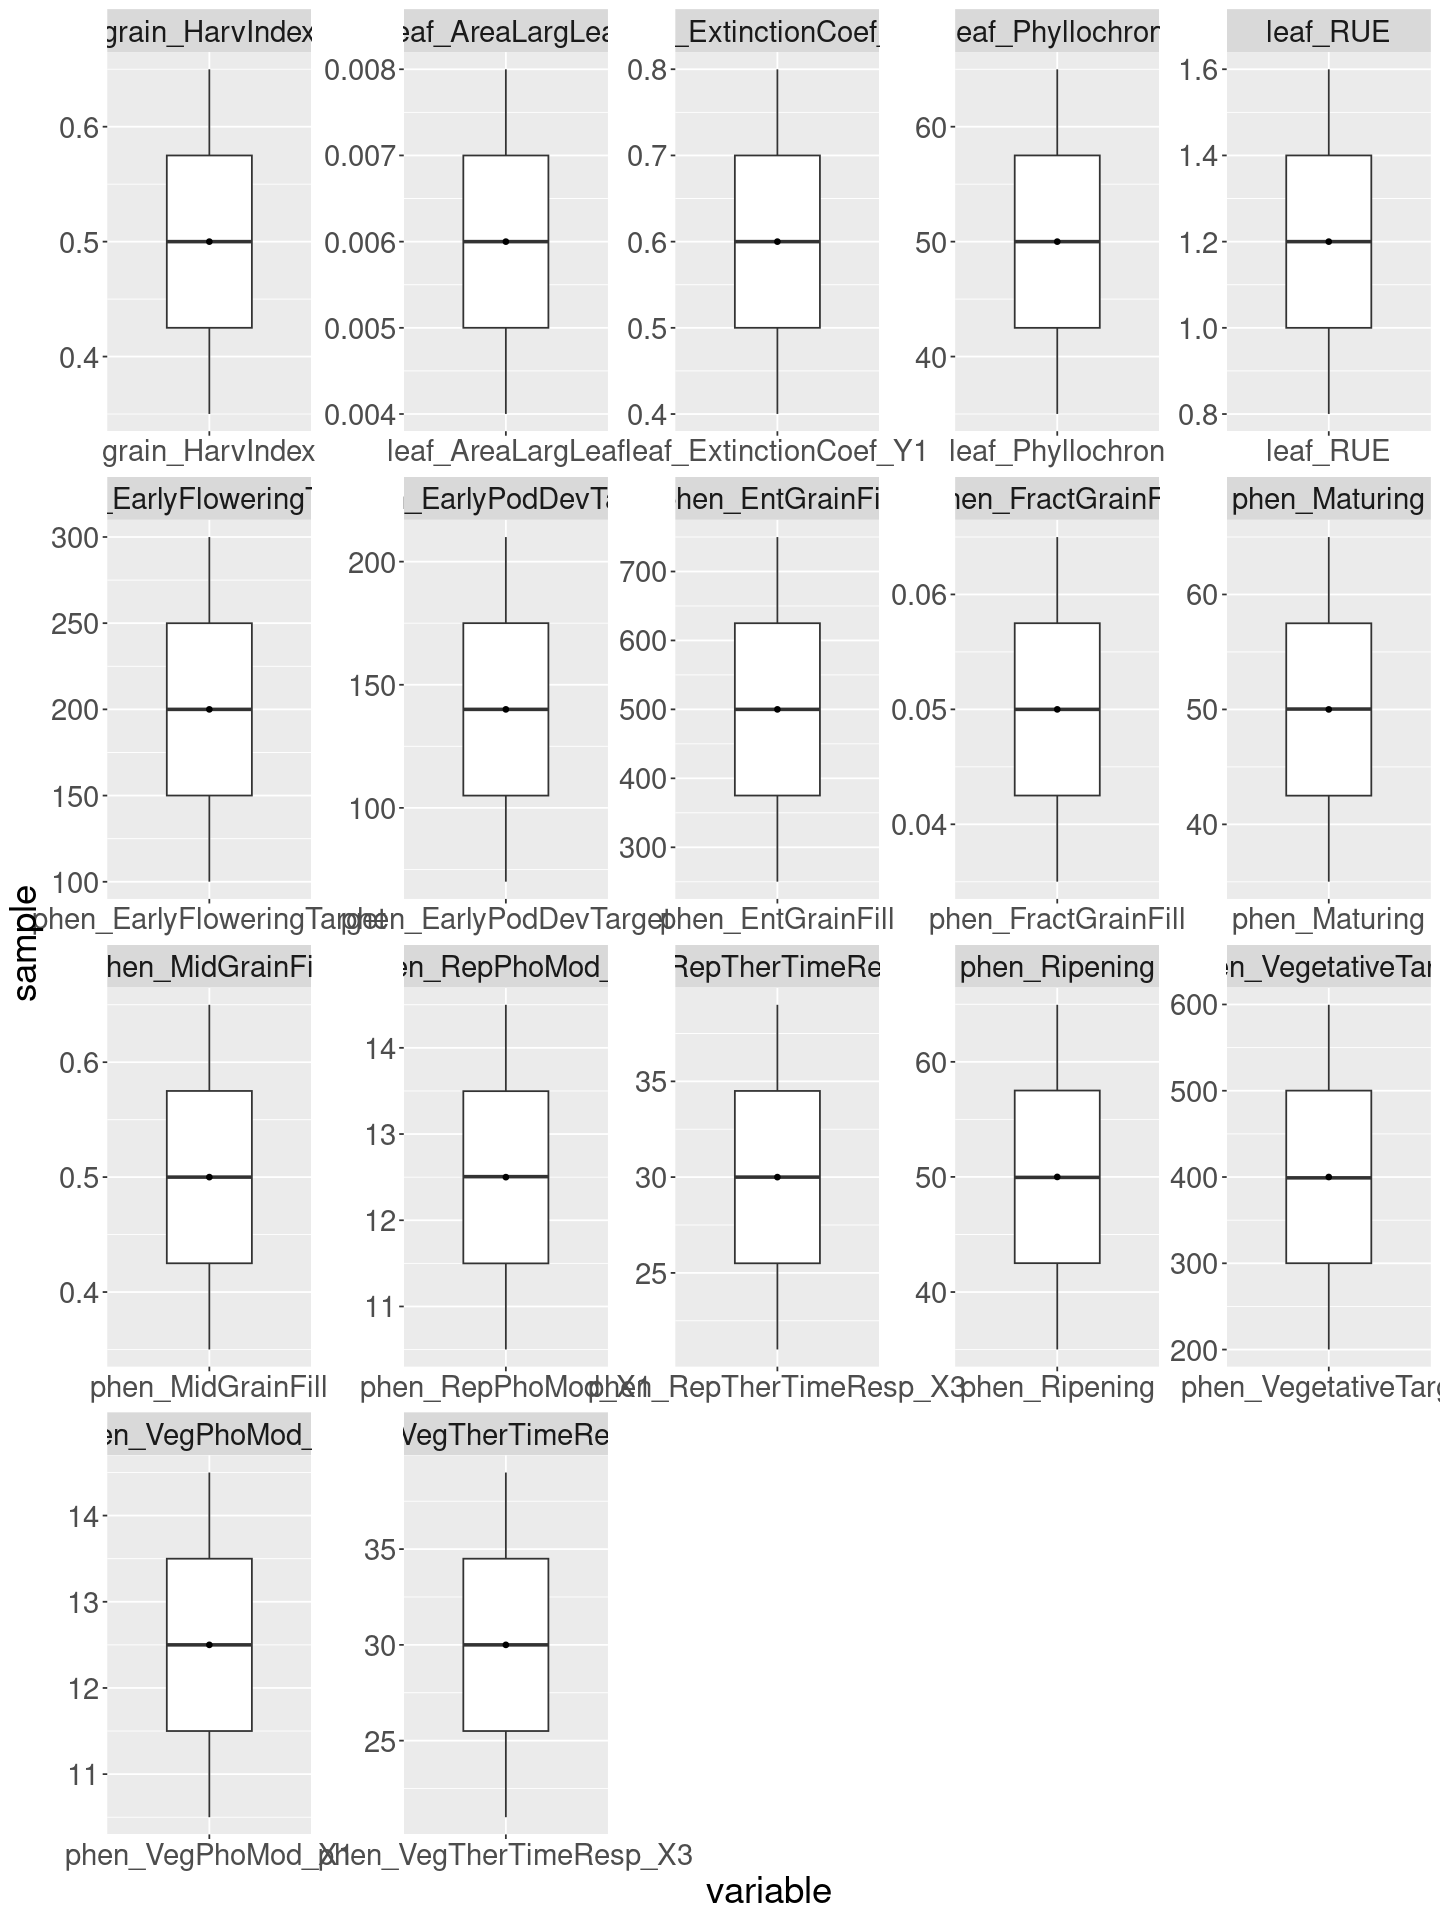

In [68]:
options(repr.plot.width = 12, repr.plot.height = 16)

plt <- ggplot(data = df_samples) +
	geom_boxplot(aes(x = variable, y = sample), alpha = 1, outlier.colour = "darkred", width = 0.5) +
	stat_summary(aes(group = variable, x = variable, y = sample), fun = mean, geom = "point", shape = 20, size=2, color="black", na.rm = T) +
	facet_wrap(variable ~ ., scales = "free") +
	theme(
			text = element_text(size = 22),
	)
plt

# Boxplot RUE (Biomass and Yield) with Topt (Flowering and Maturity)

In [3]:
library(readxl)

original_summarized <- read.csv("sensi_0508_summarized.csv") |>
  dplyr::filter(field != "PI14f")

original_samples <- read.csv("sensi_0508_samples.csv")

df_samples <- original_samples |>
  # select(id, leaf_RUE, phen_VegTherTimeResp_X3) |>
	# rename(RUE = leaf_RUE, Topt = phen_VegTherTimeResp_X3) |>
	tidyr::pivot_longer(!c(id), names_to = "variable", values_to = "sample") |>
  mutate(variable = case_when(
    grepl('phen_VegTherTimeResp_X3',variable) ~ "V_Topt",
    grepl('phen_RepTherTimeResp_X3',variable) ~ "R_Topt",
    grepl('phen_VegPhoMod_X1',variable) ~ "V_Pcrit",
    grepl('phen_RepPhoMod_X1',variable) ~ "R_Pcrit",
    grepl('phen_VegetativeTarget',variable) ~ "Veget",
    grepl('phen_EarlyFloweringTarget',variable) ~ "E_Flow",
    grepl('phen_EarlyPodDevTarget',variable) ~ "E_Pod",
    grepl('phen_FractGrainFill',variable) ~ "E_Grain",
    grepl('phen_MidGrainFill',variable) ~ "M_Grain",
    grepl('phen_EntGrainFill',variable) ~ "L_Grain",
    grepl('phen_Maturing',variable) ~ "Matur",
    grepl('phen_Ripening',variable) ~ "Ripp",
    grepl('leaf_RUE',variable) ~ "RUE",
    grepl('leaf_ExtinctionCoef_Y1',variable) ~ "Extinc",
    grepl('leaf_AreaLargLeaf',variable) ~ "A_Leaf",
    grepl('leaf_Phyllochron',variable) ~ "Phyll",
    grepl('grain_HarvIndex',variable) ~ "H_ind",
    # grepl('root_EarlyFrontVel',variable) ~ "EarlyRootFrontVel",
    # grepl('root_LateFrontVel',variable) ~ "LateRootFrontVel",
    # grepl('nodule_VegGrowthRate',variable) ~ "VegGrowthRate",
    # grepl('nodule_RepGrowthRate',variable) ~ "RepGrowthRate",
    # grepl('nodule_MaxFixRate',variable) ~ "MaxFixRate",
    # grepl('soil_KL',variable) ~ "KL",
    .default = variable)
  )

unique(df_samples$variable)
dim(df_samples)
tail(df_samples)

head(original_summarized)

df_sim <- original_summarized |>
  select(c("id", "field", "yield", "biomass", "flowering", "pod_development", "start_grain_filling", "maturity")) |>
  # emergence	end_grain_filling
  # select(c("id", "field", "yield", "biomass")) |>
  rename(
    sim_yield = yield,
    sim_biomass = biomass,
    sim_flowering = flowering,
    sim_pod_development = pod_development,
    sim_start_grain_filling = start_grain_filling,
    sim_maturity = maturity
  ) |>
  # rename(sim_yield = yield, sim_biomass = biomass) |>
  arrange(id)

dim(df_sim)
tail(df_sim)

df_obs <- read_excel(file.path(TABLES_FOLDER, "dados_campo-4-medidas.xlsx"), sheet = "dados_obs") |>
  select(field, yield, biomass, flowering, pod_development, start_grain_filling, maturity) |>
	rename(
    obs_yield = yield,
    obs_biomass = biomass,
    obs_flowering = flowering,
    obs_pod_development = pod_development,
    obs_start_grain_filling = start_grain_filling,
    obs_maturity = maturity
  )
	# rename(obs_yield = yield, obs_biomass = biomass)

dim(df_obs)
tail(df_obs)

[1] "V_Topt"  "R_Topt"  "V_Pcrit" "R_Pcrit" "Veget"   "E_Flow"  "E_Pod"  
 [8] "E_Grain" "M_Grain" "L_Grain" "Matur"   "Ripp"    "RUE"     "A_Leaf" 
[15] "Phyll"   "Extinc"  "H_ind"

[1] 144500      3

id,variable,sample
<int>,<chr>,<dbl>
8500,Ripp,41.178692453
8500,RUE,0.967965132
8500,A_Leaf,0.004855826
8500,Phyll,40.698692453
8500,Extinc,0.477582566
8500,H_ind,0.480186925


,id,field,yield,biomass,emergence,flowering,pod_development,start_grain_filling,end_grain_filling,maturity
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,CA15,7398.546,15668.67,7,56,77,94,161,168
2,1,CA16,6490.118,14082.30,7,56,79,95,158,163
3,1,CR16,6582.901,14122.96,7,52,73,87,147,152
4,1,CR17,6623.498,13908.23,6,53,73,89,148,154
5,1,CR18,7637.684,16045.99,6,51,73,90,155,161
6,1,FW14a,7168.922,15354.82,8,56,77,90,140,145


[1] 187000      8

,id,field,sim_yield,sim_biomass,sim_flowering,sim_pod_development,sim_start_grain_filling,sim_maturity
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
186995,8500,MB16,1526.708,3543.834,31,46,58,106
186996,8500,MV16,2366.990,5464.444,37,53,63,102
186997,8500,PI14a,2906.455,6870.670,41,60,73,120
186998,8500,PI14b,3516.527,8457.738,41,60,73,120
186999,8500,PI14c,2299.189,5587.176,43,61,74,113
187000,8500,PI14d,2326.512,5724.727,43,61,74,113


[1] 32  7

field,obs_yield,obs_biomass,obs_flowering,obs_pod_development,obs_start_grain_filling,obs_maturity
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PL14,3000.00,8232.0,34,49,59,111
PL15,3132.00,10426.0,37,52,62,120
PL16,3592.00,9343.0,39,54,64,106
CR16,5130.61,10865.2,57,71,78,120
CR17,5762.55,11903.4,56,70,84,119
CR18,4628.58,11903.0,57,71,85,120


### Merge simulated + sample by id + fielddata by field

In [4]:
df_sim_sample_obs_site <- df_samples |>
  merge(df_sim, by = "id") |>
  merge(df_obs, by = "field") |>
	arrange(id) |>
  # mutate(site = case_when(
	# 	grepl('CA',field) ~ "CA",
  #   grepl('CR',field) ~ "CR",
  #   grepl('FW',field) ~ "FW",
  #   grepl('MB',field) ~ "MB",
  #   grepl('MV',field) ~ "MV",
  #   grepl('PL',field) ~ "PL",
	# 	grepl('LO14a', field) ~ "LOr",
	# 	grepl('LO14b', field) ~ "LOi",
	# 	grepl('LO14c', field) ~ "LOr",
	# 	grepl('LO14d', field) ~ "LOi",
	# 	grepl('LO14e', field) ~ "LOr",
	# 	grepl('LO14f', field) ~ "LOi",
	# 	grepl('PI14a', field) ~ "PIr",
	# 	grepl('PI14b', field) ~ "PIi",
	# 	grepl('PI14c', field) ~ "PIr",
	# 	grepl('PI14d', field) ~ "PIi",
	# 	grepl('PI14e', field) ~ "PIr",
	# 	grepl('PI14f', field) ~ "PIi",
	# 	.default = field)
  # )
  filter(field %in% c("FW14a", "FW14b", "PI14a", "PI14b", "PI14c", "PI14d", "CR16", "CR17", "CR18"))
  # filter(field %in% c("CR16", "CR17", "CR18"))
  # filter(field %in% c("FW14a", "FW14b", "PI14a", "PI14b", "PI14c", "PI14d"))

# rm(df_sim_sample, df_obs)
unique(df_sim_sample_obs_site$field)
unique(df_sim_sample_obs_site$field)
dim(df_sim_sample_obs_site)
tail(df_sim_sample_obs_site, 32)

[1] "CR16"  "CR17"  "CR18"  "FW14a" "FW14b" "PI14a" "PI14b" "PI14c" "PI14d"

[1] "CR16"  "CR17"  "CR18"  "FW14a" "FW14b" "PI14a" "PI14b" "PI14c" "PI14d"

[1] 1300500      16

,field,id,variable,sample,sim_yield,sim_biomass,sim_flowering,sim_pod_development,sim_start_grain_filling,sim_maturity,obs_yield,obs_biomass,obs_flowering,obs_pod_development,obs_start_grain_filling,obs_maturity
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1300469,PI14c,8500,R_Topt,2.449122e+01,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113
1300470,PI14c,8500,V_Pcrit,1.129183e+01,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113
1300471,PI14c,8500,R_Pcrit,1.130783e+01,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113
1300472,PI14c,8500,Veget,2.823826e+02,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113
1300473,PI14c,8500,E_Flow,1.419913e+02,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113
1300474,PI14c,8500,E_Pod,9.995390e+01,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113
1300475,PI14c,8500,E_Grain,4.069869e-02,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113
1300476,PI14c,8500,M_Grain,4.081869e-01,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113
1300477,PI14c,8500,L_Grain,3.489782e+02,2299.189,5587.176,43,61,74,113,2546,6153,45,64,74,113


### Compute abs(sim-obs) for all 4 parameters

In [5]:
df_sim_sample_obs_site_diff <- df_sim_sample_obs_site |>
	mutate(
    diff_biomass = abs(sim_biomass - obs_biomass),
    diff_yield = abs(sim_yield - obs_yield),
    diff_flowering = abs(sim_flowering - obs_flowering),
    diff_pod_development = abs(sim_pod_development - obs_pod_development),
    diff_start_grain_filling = abs(sim_start_grain_filling - obs_start_grain_filling),
    diff_maturity = abs(sim_maturity - obs_maturity)
  ) |>
	# select(site, field, variable, id, sample, diff_biomass, diff_yield, diff_flowering, diff_maturity) |>
	select(field, variable, id, sample, diff_biomass, diff_yield, diff_flowering, diff_pod_development, diff_start_grain_filling, diff_maturity) |>
	# select(field, variable, id, sample, diff_biomass, diff_yield, diff_flowering, diff_maturity) |>
	arrange(field, variable, id)

dim(df_sim_sample_obs_site_diff)
head(df_sim_sample_obs_site_diff)

[1] 1300500      10

,field,variable,id,sample,diff_biomass,diff_yield,diff_flowering,diff_pod_development,diff_start_grain_filling,diff_maturity
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CR16,A_Leaf,1,0.007191668,3257.760,1452.291,5,2,9,32
2,CR16,A_Leaf,2,0.007287668,3569.065,1635.868,3,4,12,36
3,CR16,A_Leaf,3,0.007383668,3773.431,1682.943,6,1,9,32
4,CR16,A_Leaf,4,0.007479668,3863.181,1826.020,9,4,4,28
5,CR16,A_Leaf,5,0.007575668,4111.310,1917.222,10,4,4,28
6,CR16,A_Leaf,6,0.007671668,4457.758,2080.619,9,3,5,30


### Filter where biomass<700 yield<500, flowering<20, maturity<10, then rbind filters and group by

In [9]:
# df_filt_biomass <- df_sim_sample_obs_site_diff |>
# 	filter(diff_biomass < 700) |>
# 	# filter(diff_biomass < 20) |>
# 	mutate(param = "biomass") |>
# 	rename(diff = diff_biomass) |>
# 	select(variable, field, id, sample, param, diff)

# dim(df_filt_biomass)
# # head(df_filt_biomass)

# df_filt_yield <- df_sim_sample_obs_site_diff |>
# 	filter(diff_yield < 400) |>
# 	# filter(diff_yield < 10) |>
# 	mutate(param = "yield") |>
# 	rename(diff = diff_yield) |>
# 	select(variable, field, id, sample, param, diff)

# dim(df_filt_yield)
# # head(df_filt_yield)

# df_filt_flowering <- df_sim_sample_obs_site_diff |>
# 	filter(diff_flowering < 10) |>
# 	# filter(diff_flowering < 6) |>
# 	mutate(param = "flowering") |>
# 	rename(diff = diff_flowering) |>
# 	select(variable, field, id, sample, param, diff)

# dim(df_filt_flowering)
# # head(df_filt_flowering)

# df_filt_maturity <- df_sim_sample_obs_site_diff |>
# 	filter(diff_maturity < 10) |>
# 	# filter(diff_maturity < 1) |>
# 	mutate(param = "maturity") |>
# 	rename(diff = diff_maturity) |>
# 	select(variable, field, id, sample, param, diff)

# dim(df_filt_maturity)
# # head(df_filt_maturity)

# df_filt_pod_development <- df_sim_sample_obs_site_diff |>
# 	filter(diff_pod_development < 10) |>
# 	# filter(diff_pod_development < 1) |>
# 	mutate(param = "pod_development") |>
# 	rename(diff = diff_pod_development) |>
# 	select(variable, field, id, sample, param, diff)

# dim(df_filt_pod_development)
# # head(df_filt_pod_development)

# df_filt_start_grain_filling <- df_sim_sample_obs_site_diff |>
# 	filter(diff_start_grain_filling < 10) |>
# 	# filter(diff_start_grain_filling < 1) |>
# 	mutate(param = "start_grain_filling") |>
# 	rename(diff = diff_start_grain_filling) |>
# 	select(variable, field, id, sample, param, diff)

# dim(df_filt_start_grain_filling)
# # head(df_filt_start_grain_filling)


# df_diff_rbind <- rbind(df_filt_biomass, df_filt_yield, df_filt_flowering, df_filt_pod_development, df_filt_start_grain_filling, df_filt_maturity) |>
# 	arrange(variable, field, id)

# dim(df_diff_rbind)
# head(df_diff_rbind, 10)

In [26]:
head(df_sim_sample_obs_site_diff)

df_diff_rbind <- df_sim_sample_obs_site_diff |>
	# filter(diff_biomass < 700, diff_yield < 400, diff_flowering < 10, diff_maturity < 10, diff_pod_development < 10, diff_start_grain_filling < 10) |>
	filter(diff_biomass < 400, diff_yield < 300, diff_flowering < 8, diff_maturity < 8, diff_pod_development < 8, diff_start_grain_filling < 8) |>
  rename(biomass = diff_biomass, yield = diff_yield, flowering = diff_flowering, maturity = diff_maturity, pod_development = diff_pod_development, start_grain_filling = diff_start_grain_filling) |>
  tidyr::pivot_longer(cols = c("biomass", "yield", "flowering", "maturity", "pod_development", "start_grain_filling"), names_to = "param", values_to = "diff") |>
  select(variable, field, id, sample, param, diff) |>
	arrange(variable, field, id)

print(paste("Quantas samples sobraram:", length(unique(df_diff_rbind$id))))
dim(df_diff_rbind)
head(df_diff_rbind)

df_plot <- df_diff_rbind |>
	select(variable, field, param, sample) |>
	mutate(hline = case_when(
		variable == 'A_Leaf' ~ 0.006,
		variable == 'E_Flow' ~ 180,
		variable == 'E_Grain' ~ 0.056,
		variable == 'E_Pod' ~ 140,
		variable == 'Extinc' ~ 0.6,
		variable == 'H_ind' ~ 0.5,
		variable == 'L_Grain' ~ 712,
		variable == 'M_Grain' ~ 0.5,
		variable == 'Matur' ~ 45,
		variable == 'Phyll' ~ 45,
		variable == 'RUE' ~ 1.2,
		variable == 'R_Pcrit' ~ 12.58,
		variable == 'R_Topt' ~ 30,
		variable == 'Ripp' ~ 45,
		variable == 'V_Pcrit' ~ 12.58,
		variable == 'V_Topt' ~ 30,
		variable == 'Veget' ~ 404,
		.default = 999)
  ) |>
	tidyr::unite("variable_param", c(variable, param), sep = "_", remove = FALSE)

unique(df_plot$field)
unique(df_plot$param)
dim(df_plot)
head(df_plot)


,field,variable,id,sample,diff_biomass,diff_yield,diff_flowering,diff_pod_development,diff_start_grain_filling,diff_maturity
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,CR16,A_Leaf,1,0.007191668,3257.760,1452.291,5,2,9,32
2,CR16,A_Leaf,2,0.007287668,3569.065,1635.868,3,4,12,36
3,CR16,A_Leaf,3,0.007383668,3773.431,1682.943,6,1,9,32
4,CR16,A_Leaf,4,0.007479668,3863.181,1826.020,9,4,4,28
5,CR16,A_Leaf,5,0.007575668,4111.310,1917.222,10,4,4,28
6,CR16,A_Leaf,6,0.007671668,4457.758,2080.619,9,3,5,30


[1] "Quantas samples sobraram: 112"


[1] 12852     6

variable,field,id,sample,param,diff
<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>
A_Leaf,CR16,2951,0.006538145,biomass,254.710
A_Leaf,CR16,2951,0.006538145,yield,286.204
A_Leaf,CR16,2951,0.006538145,flowering,7.000
A_Leaf,CR16,2951,0.006538145,maturity,5.000
A_Leaf,CR16,2951,0.006538145,pod_development,5.000
A_Leaf,CR16,2951,0.006538145,start_grain_filling,0.000


[1] "CR16"  "CR18"  "FW14b" "PI14a" "PI14b" "PI14c"

[1] "biomass"             "yield"               "flowering"          
[4] "maturity"            "pod_development"     "start_grain_filling"

[1] 12852     6

variable_param,variable,field,param,sample,hline
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A_Leaf_biomass,A_Leaf,CR16,biomass,0.006538145,0.006
A_Leaf_yield,A_Leaf,CR16,yield,0.006538145,0.006
A_Leaf_flowering,A_Leaf,CR16,flowering,0.006538145,0.006
A_Leaf_maturity,A_Leaf,CR16,maturity,0.006538145,0.006
A_Leaf_pod_development,A_Leaf,CR16,pod_development,0.006538145,0.006
A_Leaf_start_grain_filling,A_Leaf,CR16,start_grain_filling,0.006538145,0.006


In [28]:
write.csv(df_diff_rbind, "df_diff.csv", row.names = FALSE)

### Boxplot

[1] "#B3E2CD" "#FDCDAC" "#CBD5E8" "#F4CAE4" "#E6F5C9" "#FFF2AE" "#F1E2CC"
[8] "#CCCCCC"

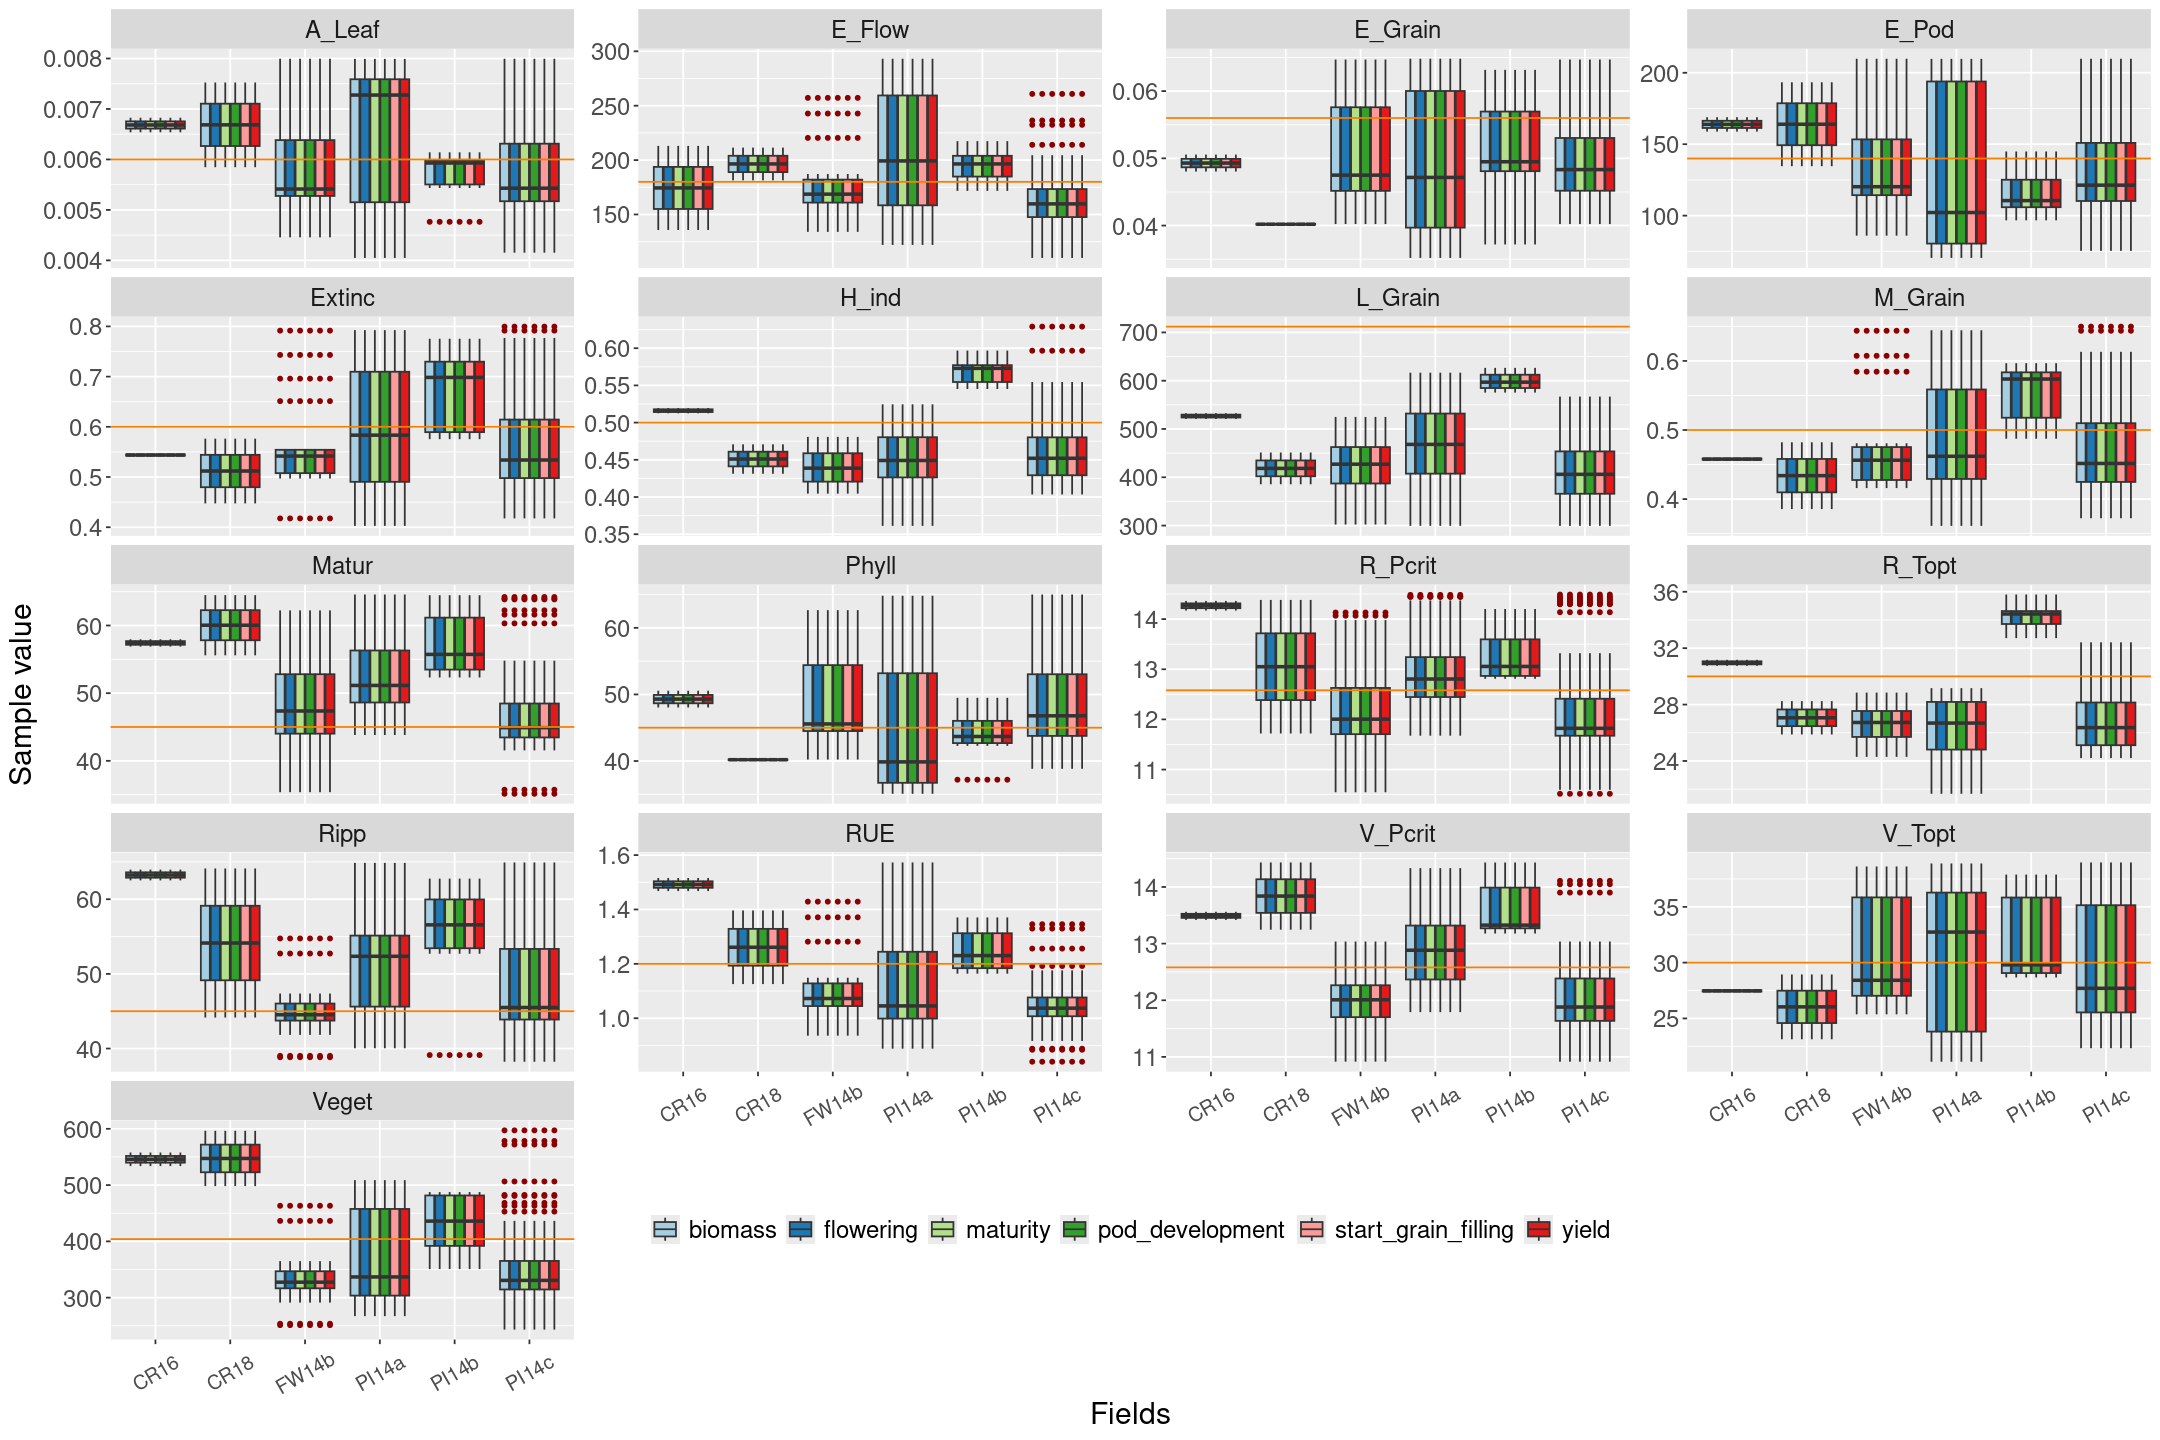

In [27]:
library(RColorBrewer)

brewer.pal(n = 8, name = "Pastel2")

options(repr.plot.width = 18, repr.plot.height = 12)

plt <- df_plot |>
  # filter(field %in% c("CR16", "CR17", "CR18")) |>
  # ggplot(data = df_plot, aes(group = param, x = field, y = sample, fill = param)) +
  ggplot(aes(x = field, y = sample, fill = param)) +
    # stat_boxplot(geom = "errorbar", width = 0.2, position = position_dodge(0.9), na.rm = T) +
    # geom_violin(trim = FALSE, color = "black", na.rm = T) +
    # geom_violin(trim = FALSE, color = "black", na.rm = T) +
    # geom_boxplot(alpha = 1, outlier.colour = "darkred", width = 0.1, position = position_dodge(0.9)) +
    geom_boxplot(outlier.colour = "darkred", width = 0.8, outlier.size = 1) +
    # stat_summary(fun.y=mean, geom="point", shape=20, size=2, color="black", position = position_dodge(0.9), na.rm = T) +
    # stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "black", na.rm = TRUE) +
    # theme_bw() +
    facet_wrap(variable ~ ., scales = "free_y", ncol = 4) +
    # facet_grid(variable ~ param, scales = "free_y") +
    geom_hline(aes(yintercept = hline), color = "#f58002") +
    scale_fill_brewer(name = "", palette = "Paired", direction = 1) +
    # scale_fill_manual(name="") +
    # scale_fill_viridis_d(name="Legend:", option = "plasma", direction = 1) +
    labs(x = "Fields", y = "Sample value") +
    theme(
      text = element_text(size = 18),
      # axis.line = element_line(colour = "black", linewidth = 0.2),
      # # axis.text = element_text(size=12),
      # # axis.title = element_text(size=14),
      # legend.position = "bottom",
      legend.position = c(0.5, 0.1),
      axis.text.x = element_text(angle = 30, size = 12, vjust = 0.5)
    ) +
    guides(fill = guide_legend(nrow = 1))
plt

### Essas foram as samples que geraram a melhor cor/rmse.. com o field data

# Teste PRCC - Compare sample with results + Histogram - LHS

In [11]:
sampled <- read.csv("sensi_0508_samples.csv") |>
  tidyr::pivot_longer(!c(id), names_to = "variable", values_to = "value")
tail(sampled)

simulated <- read.csv("sensi_0508_summarized.csv") |>
  # dplyr::select(c("id", "field", "yield", "biomass")) |>
  filter(field == "CR16") |>
  dplyr::select(c("id", "yield", "biomass")) |>
  dplyr::arrange(id)
dim(simulated)
tail(simulated)

# simulated_mean_fields <- simulated |>
#   group_by(id) |>
#   summarise(
#     Yield = mean(Yield),
#     Biomass = mean(Biomass)
#   )
# dim(simulated_mean_fields)
# tail(simulated_mean_fields)

merged <- merge(simulated, sampled, by = "id")
tail(merged)

id,variable,value
<int>,<chr>,<dbl>
8500,phen_Ripening,41.178692453
8500,leaf_RUE,0.967965132
8500,leaf_AreaLargLeaf,0.004855826
8500,leaf_Phyllochron,40.698692453
8500,leaf_ExtinctionCoef_Y1,0.477582566
8500,grain_HarvIndex,0.480186925


[1] 8500    3

,id,yield,biomass
,<int>,<dbl>,<dbl>
8495,8495,3444.877,8769.146
8496,8496,3612.950,8371.777
8497,8497,3628.771,8003.606
8498,8498,3602.296,7691.571
8499,8499,3237.717,7303.641
8500,8500,2866.877,6926.331


,id,yield,biomass,variable,value
,<int>,<dbl>,<dbl>,<chr>,<dbl>
144495,8500,2866.877,6926.331,phen_Ripening,41.178692453
144496,8500,2866.877,6926.331,leaf_RUE,0.967965132
144497,8500,2866.877,6926.331,leaf_AreaLargLeaf,0.004855826
144498,8500,2866.877,6926.331,leaf_Phyllochron,40.698692453
144499,8500,2866.877,6926.331,leaf_ExtinctionCoef_Y1,0.477582566
144500,8500,2866.877,6926.331,grain_HarvIndex,0.480186925


`geom_smooth()` using method = 'gam'
Warning message:
“Removed 1428 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 1428 rows containing missing values or values outside the scale range
(`geom_point()`).”


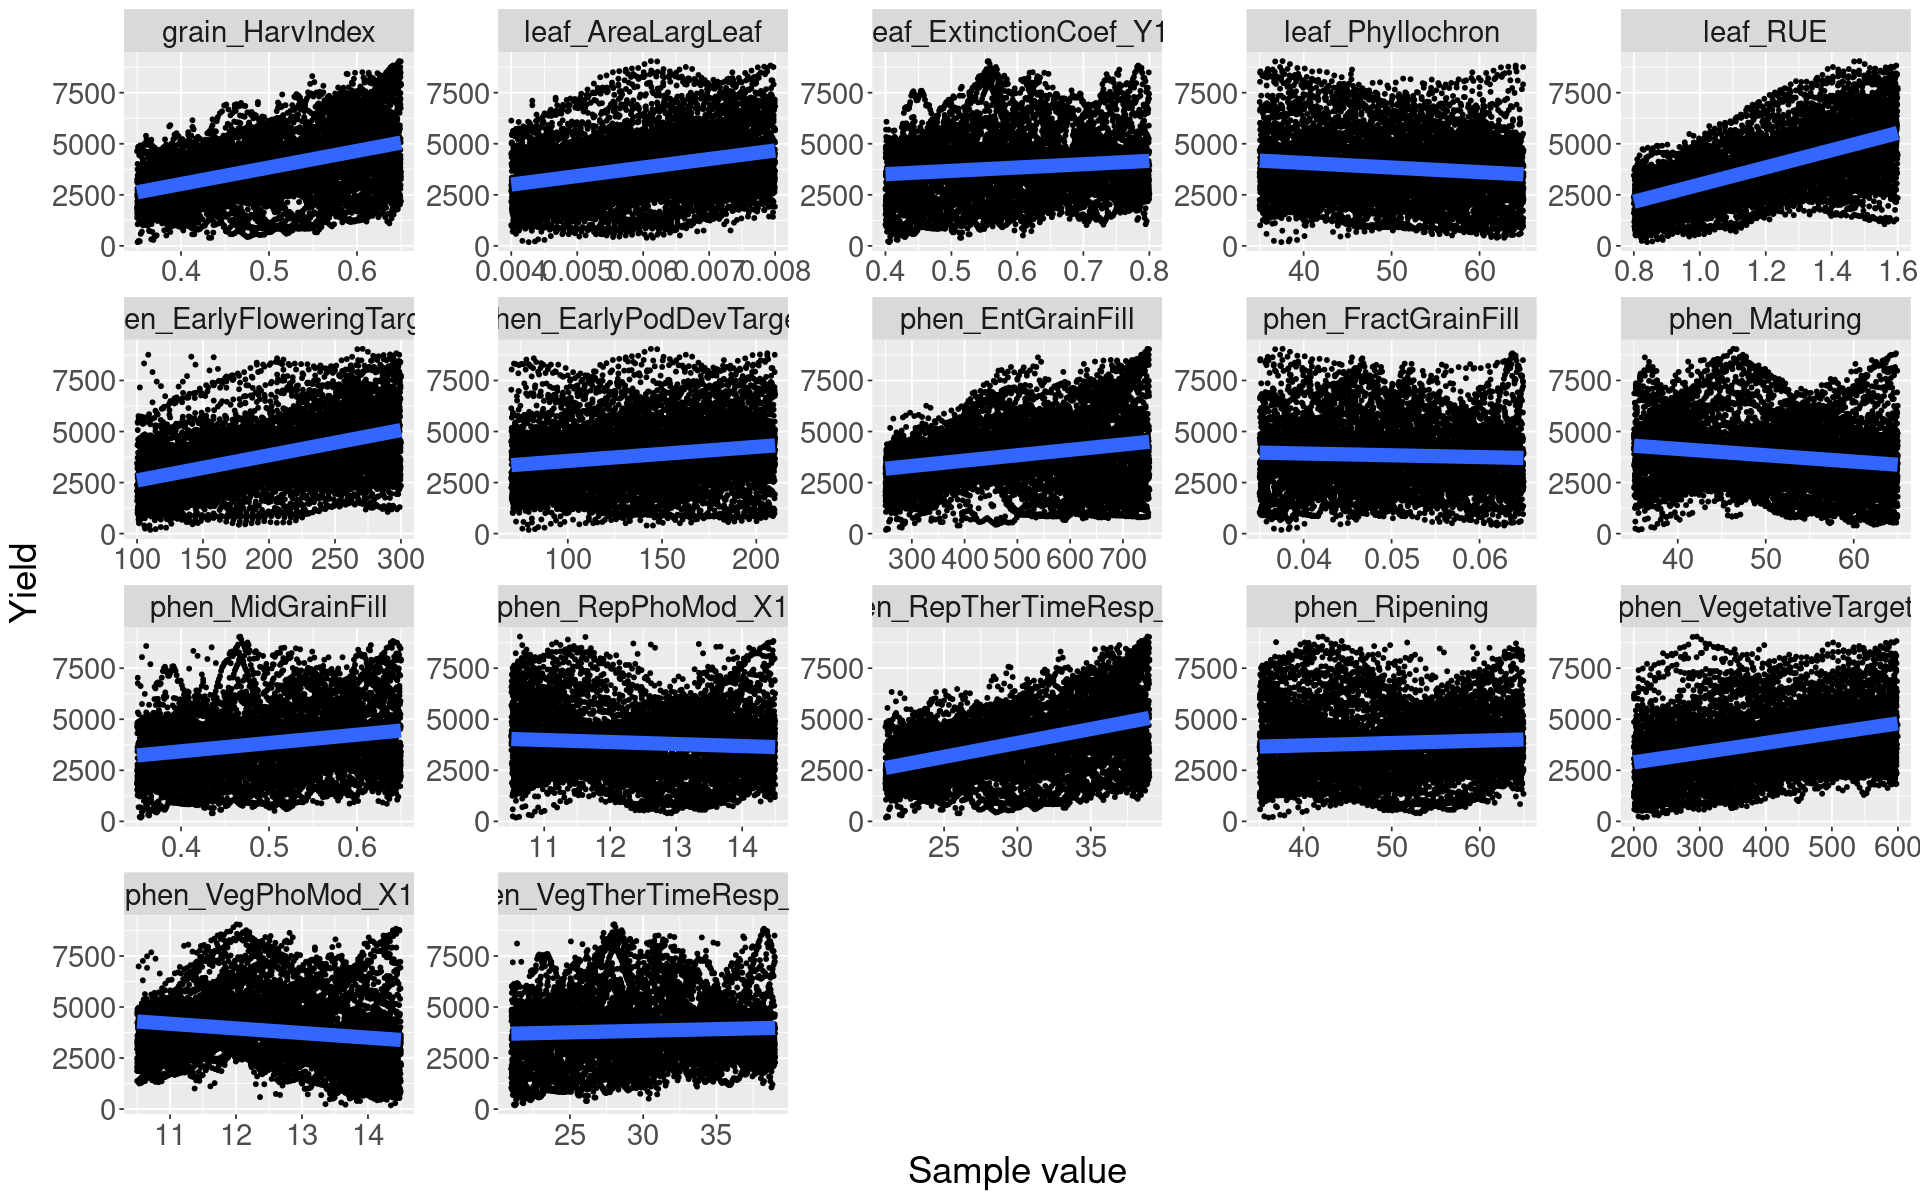

In [14]:
options(repr.plot.width = 16, repr.plot.height = 10)

ggplot(data = merged, aes(x = value, y = yield)) +
  geom_point(size = 1) +
  facet_wrap(variable ~ ., scales = "free") +
  # scale_y_continuous(name = "yield") +
  # scale_x_continuous(name = "Params") +
  geom_smooth(formula = y~x, method = "auto", se = FALSE, fullrange = TRUE, size = 4) +
  # stat_regline_equation(label.x = x_labels, label.y = y_positions, size = 5, show.legend = FALSE) + 
  # stat_cor(method = "pearson", label.x = x_cor, label.y = y_positions, size = 5, show.legend = FALSE, p.accuracy = 0.001, r.accuracy = 0.01) +
  # geom_abline(intercept = 0, slope = 1) +
  labs(x = "Sample value", y = "Yield") +
  theme(
    legend.position = "bottom",
    text = element_text(size = 22)
  )

# Histogram

In [22]:
simulated <- read.csv("1000_summarize_all_sim_groupby_field.csv", row.names=NULL) |>
    # filter(field == "CA14") |>
    # select(c("id","Yield","Biomass")) |>
    arrange(id)
dim(simulated)
tail(simulated)


simulated17000 <- read.csv("17000_summarize_all_sim_groupby_field.csv", row.names=NULL) |>
    # filter(field == "CA14") |>
    # select(c("id","Yield","Biomass")) |>
    arrange(id)
dim(simulated17000)
tail(simulated17000)

[1] 32000     9

,X,id,field,Yield,Biomass,Flowering,Pod.Development,Grain.Filling,Maturity
,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
31995,123,1000,PI14d,4384.654,1022.174,43,59,71,127
31996,124,1000,PI14e,4362.130,1002.340,39,52,62,NA
31997,125,1000,PI14f,4749.700,1097.775,39,52,62,NA
31998,126,1000,PL14,4881.172,1144.675,43,61,75,137
31999,127,1000,PL15,5358.682,1285.451,39,55,68,125
32000,128,1000,PL16,5851.172,1400.393,46,65,78,138


[1] 544000      9

,X,id,field,Yield,Biomass,Flowering,PodDevelopment,GrainFilling,Maturity
,<int>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
543995,543547,17000,PI14d,3058.195,840.855,43,59,71,126
543996,543548,17000,PI14e,3064.742,787.607,39,51,61,NA
543997,543549,17000,PI14f,3391.549,908.142,39,51,61,NA
543998,543550,17000,PL14,3307.373,902.385,42,60,74,136
543999,543551,17000,PL15,3675.894,1012.940,38,54,66,124
544000,543552,17000,PL16,4084.921,1119.472,45,64,76,136


Warning message:
“Removed 128 rows containing non-finite outside the scale range (`stat_bin()`).”


Warning message:
“Removed 128 rows containing non-finite outside the scale range (`stat_ecdf()`).”
Warning message:
“Removed 128 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 128 rows containing non-finite outside the scale range (`stat_ecdf()`).”
Warning message:
“Removed 2797 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2797 rows containing non-finite outside the scale range
(`stat_ecdf()`).”
Warning message:
“Removed 47173 rows containing non-finite outside the scale range
(`stat_bin()`).”
Warning message:
“Removed 47173 rows containing non-finite outside the scale range
(`stat_ecdf()`).”


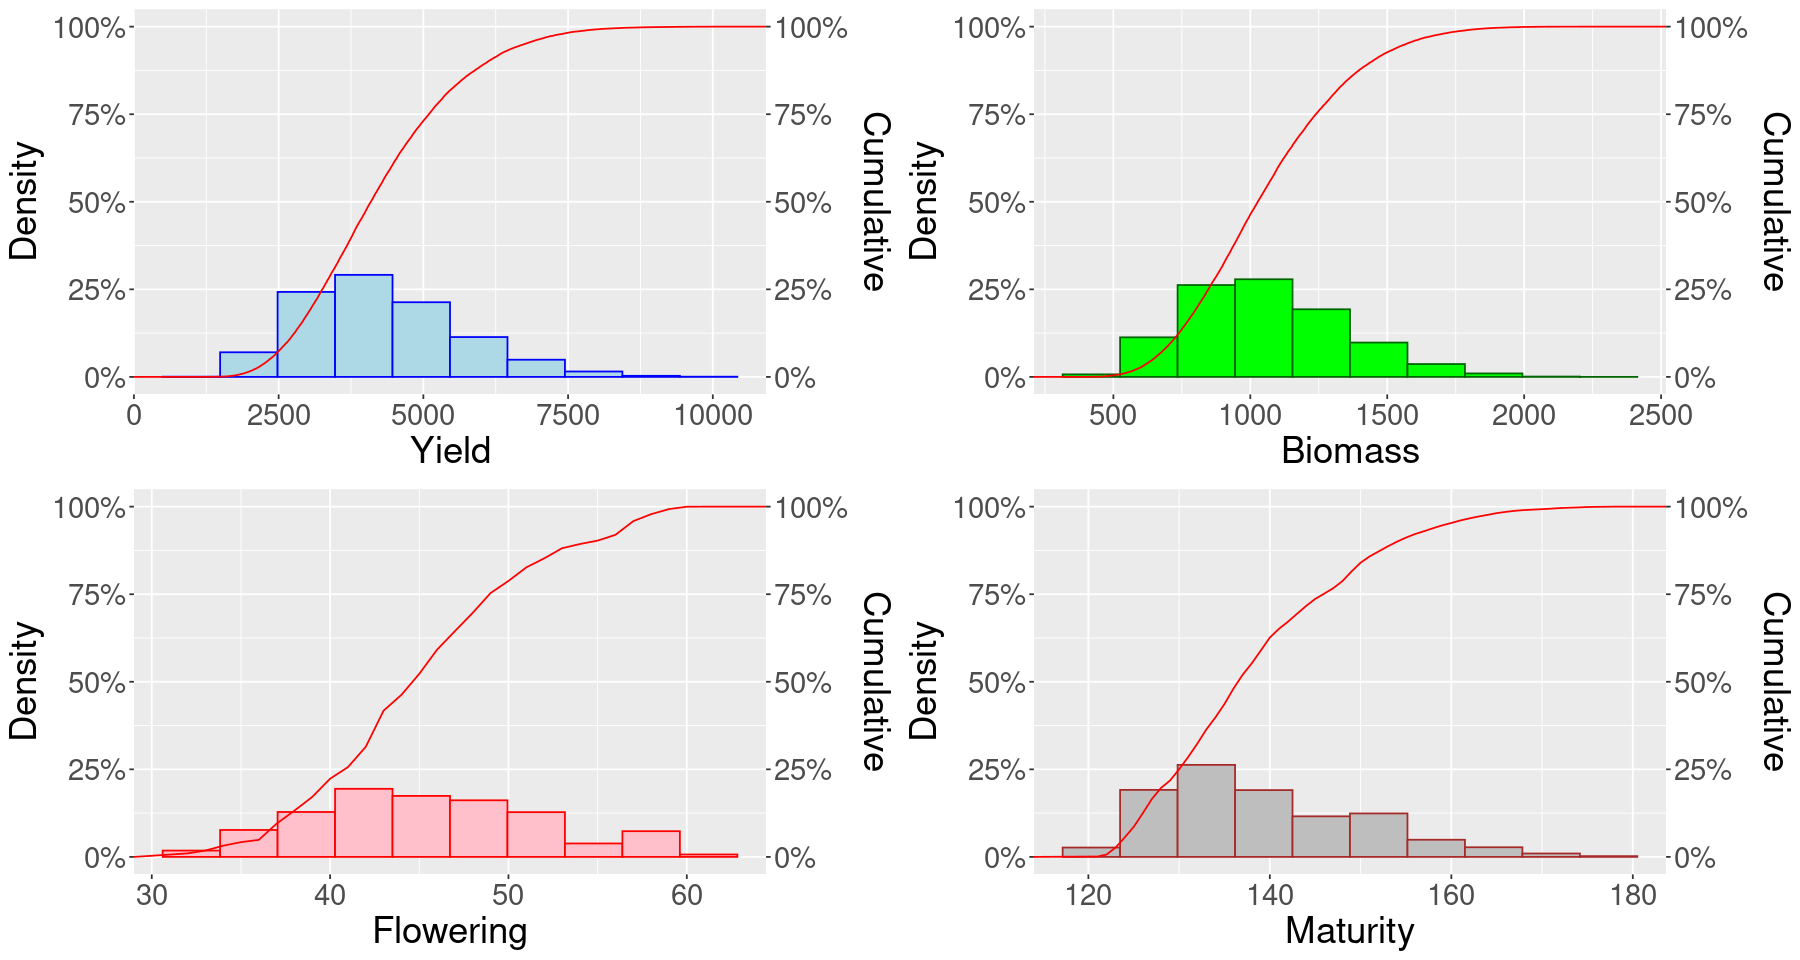

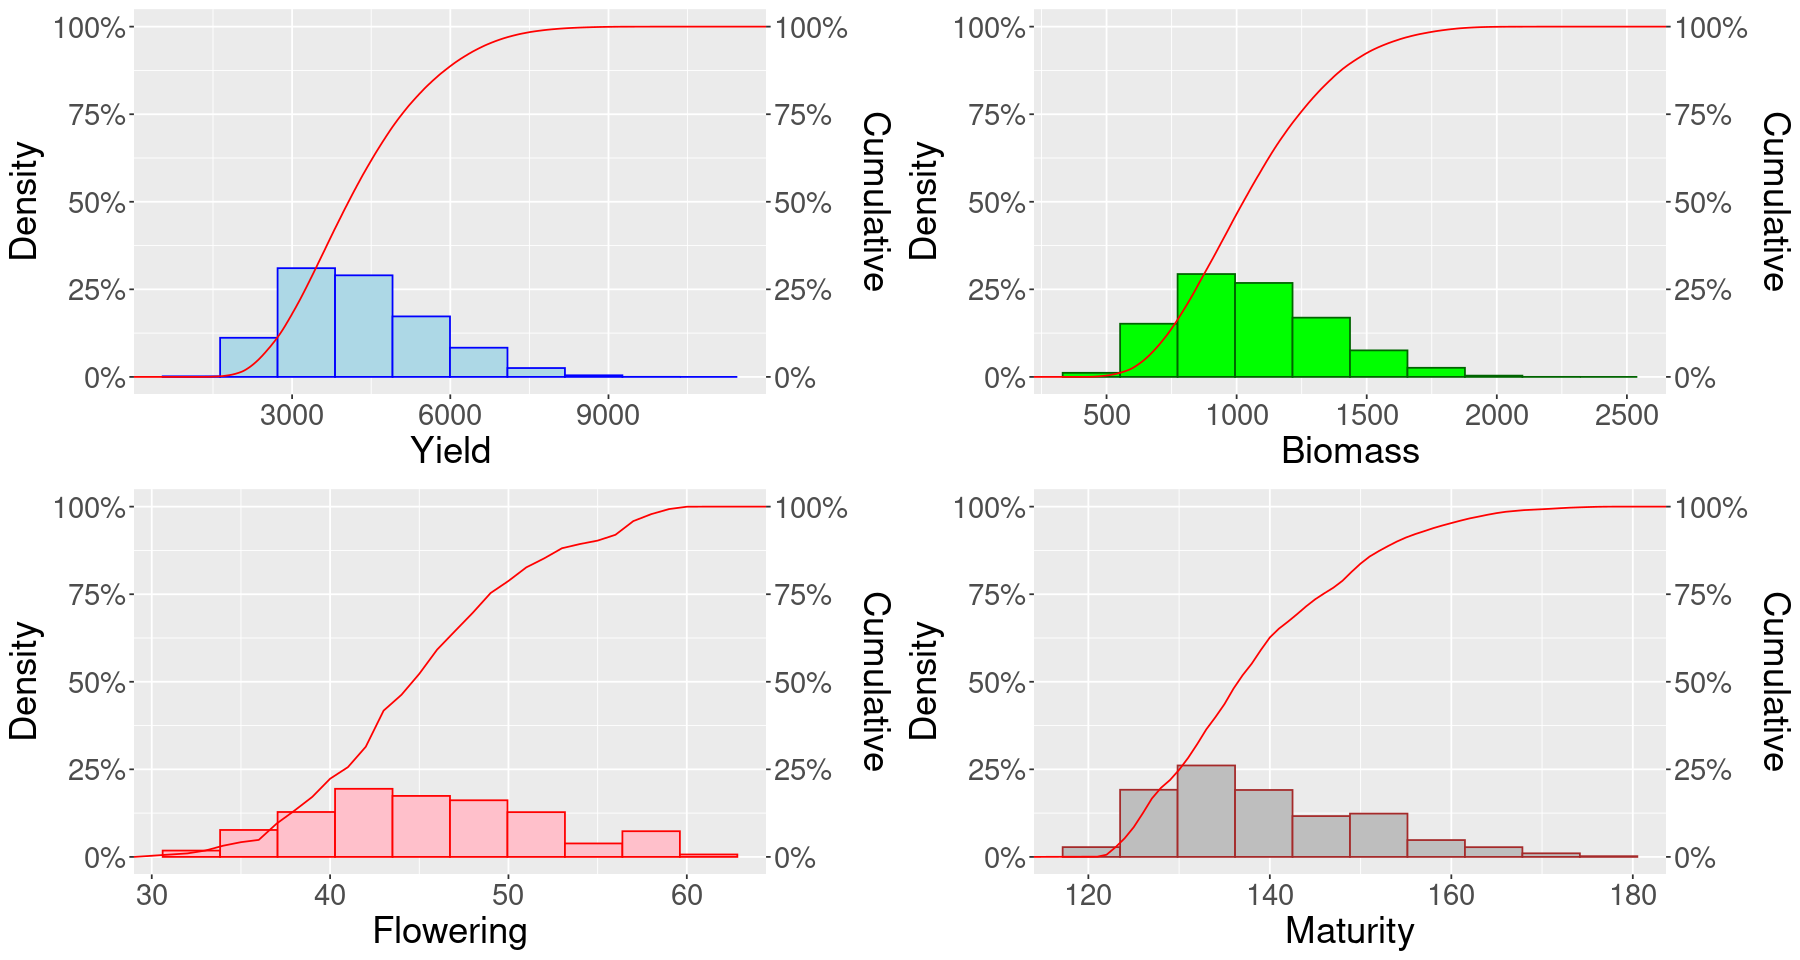

In [23]:
library(gridExtra)

plot_hist <- function(df, var, color1, color2, binwidth){

    # plot_data <- data.frame(x = simulated[var])

    plt <- ggplot(data=df, aes_string(x = var)) +
        geom_histogram(
            # aes(y = ..density..),
            aes(y = after_stat(count / sum(count))), 
            # aes(y = cumsum(..count..)),
            # position="identity",
            colour=color1, 
            fill=color2, 
            # binwidth=binwidth
            bins=10
        ) +
        # geom_bar(aes(y = ..density..), fill = "skyblue", color = "black", alpha = 0.7, binwidth = 0.5) +

        # stat_bin(aes(y=cumsum(..count..)),binwidth = 0.2, geom="line",color="red")+
        stat_ecdf(geom = "line", color = "red") +
        # geom_line(stat = "bin") +
        
        # stat_bin(aes(y=cumsum(..count..)),geom="line",color="green")

        scale_y_continuous(
            name = "Density", 
            labels = scales::percent,
            sec.axis = sec_axis(
                ~.*1, 
                name = "Cumulative",
                labels = scales::percent
            )
        ) +
        
        theme(
            legend.position = "bottom",
            text = element_text(size=22)
        )
    return(plt)
}

plt1 <- plot_hist(simulated, "Yield", "blue", "lightblue")
plt2 <- plot_hist(simulated, "Biomass", "darkgreen", "green")
plt3 <- plot_hist(simulated, "Flowering", "red", "pink")
plt4 <- plot_hist(simulated, "Maturity", "brown", "gray")

options(repr.plot.width=15, repr.plot.height=8)
arrange <- grid.arrange(
    plt1, plt2, plt3, plt4,
    ncol=2, nrow=2,
    widths = c(5,5), 
    heights = c(5,5)
)



plt1 <- plot_hist(simulated17000, "Yield", "blue", "lightblue")
plt2 <- plot_hist(simulated17000, "Biomass", "darkgreen", "green")
plt3 <- plot_hist(simulated17000, "Flowering", "red", "pink")
plt4 <- plot_hist(simulated17000, "Maturity", "brown", "gray")

options(repr.plot.width=15, repr.plot.height=8)
arrange <- grid.arrange(
    plt1, plt2, plt3, plt4,
    ncol=2, nrow=2,
    widths = c(5,5), 
    heights = c(5,5)
)

# Boxplot violin

In [64]:
original_summarized <- read.csv("sensi_0508_summarized.csv", row.names = NULL)

sim_csv <- original_summarized |>
  arrange(id)
dim(sim_csv)
tail(sim_csv)

pivotado <- sim_csv |> tidyr::pivot_longer(cols = -c(id, field), names_to = "variable", values_to = "value")
  # select(-field) #|>
  # filter(variable %in% c("yield", "biomass", "flowering", "maturity"))
  # )== "yield" | variable == "Biomass" | variable == "Flowering" | variable == "Maturity")
head(pivotado)

[1] 195500     10

,id,field,yield,biomass,emergence,flowering,pod_development,start_grain_filling,end_grain_filling,maturity
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
195495,8500,MV16,2366.990,5464.444,5,37,53,63,98,102
195496,8500,PI14a,2906.455,6870.670,5,41,60,73,116,120
195497,8500,PI14b,3516.527,8457.738,5,41,60,73,116,120
195498,8500,PI14c,2299.189,5587.176,5,43,61,74,110,113
195499,8500,PI14d,2326.512,5724.727,5,43,61,74,110,113
195500,8500,PI14f,2321.401,5666.749,5,39,53,63,90,93


id,field,variable,value
<int>,<chr>,<chr>,<dbl>
1,CA15,yield,7398.546
1,CA15,biomass,15668.675
1,CA15,emergence,7.000
1,CA15,flowering,56.000
1,CA15,pod_development,77.000
1,CA15,start_grain_filling,94.000


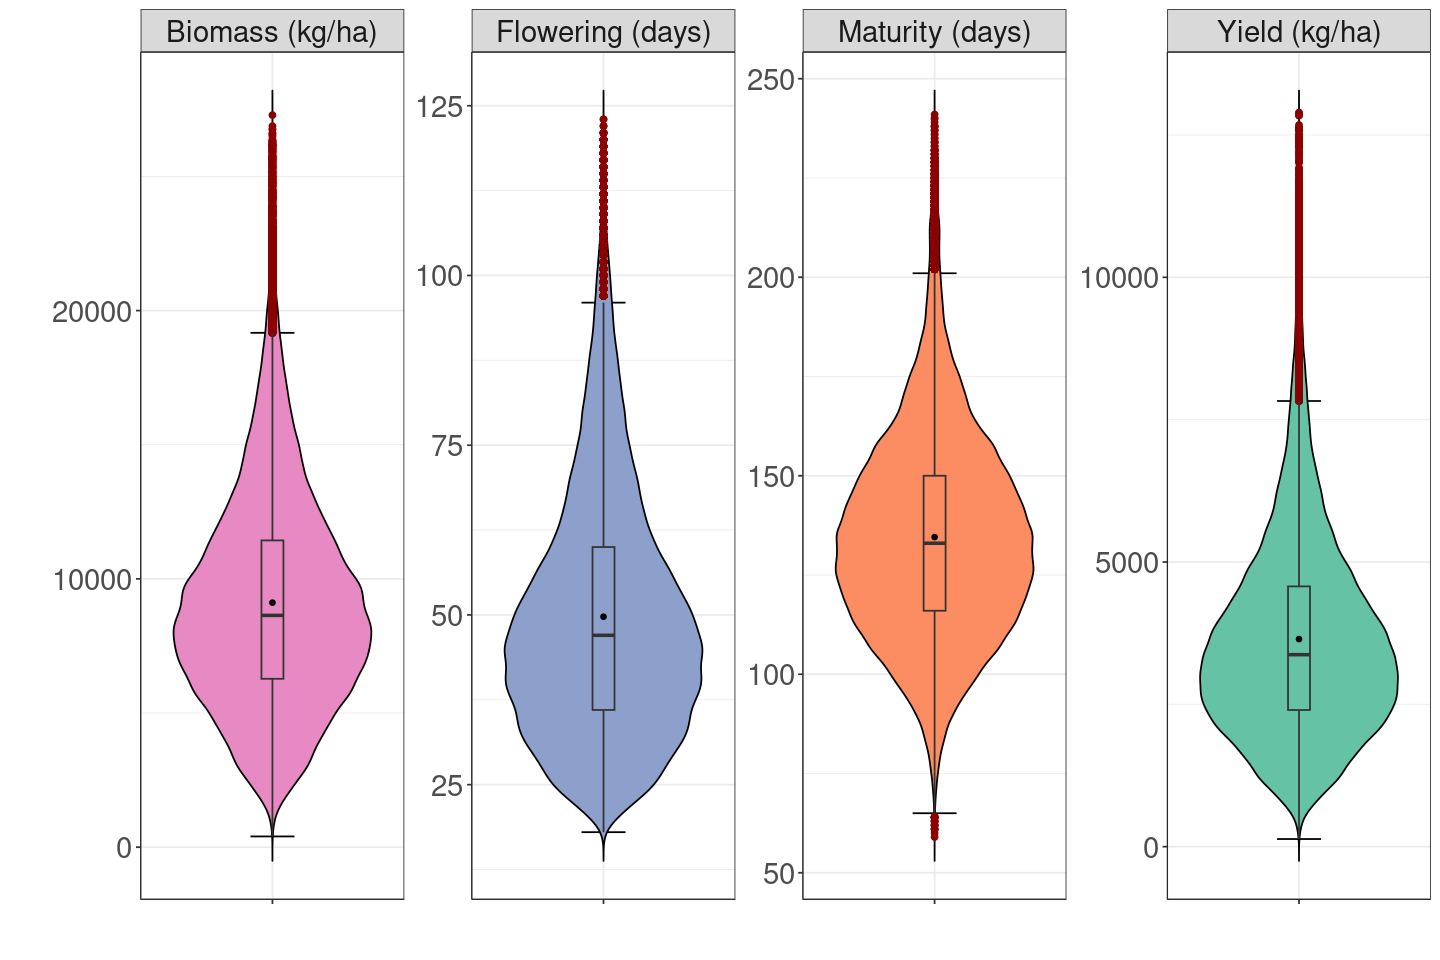

In [65]:
options(repr.plot.width = 12, repr.plot.height = 8)
# options(repr.plot.width = 12, repr.plot.height = 25)
# options(repr.plot.width = 25, repr.plot.height = 12)

plt <- pivotado |>
  mutate(variable = factor(variable, levels = c("flowering", "pod_development", "start_grain_filling", "end_grain_filling", "maturity", "biomass", "yield"))) |>
  filter(variable %in% c("flowering", "maturity", "biomass", "yield")) |>
  mutate(variable = case_when(
    grepl("flowering", variable) ~ "Flowering (days)",
    grepl("maturity", variable) ~ "Maturity (days)",
    grepl("biomass", variable) ~ "Biomass (kg/ha)",
    grepl("yield", variable) ~ "Yield (kg/ha)",
    .default = variable)
  ) |>
  ggplot(aes(x = variable, y = value, fill = variable)) +
	stat_boxplot(geom = "errorbar", width = 0.2, position = position_dodge(0.9), na.rm = TRUE) +
	geom_violin(trim = FALSE, color = "black", na.rm = TRUE) +
	geom_boxplot(alpha = 1, outlier.colour = "darkred", width = 0.1, position = position_dodge(0.9), na.rm = TRUE) +
	stat_summary(fun.y = mean, geom = "point", shape = 20, size = 2, color = "black", position = position_dodge(0.9), na.rm = TRUE) +
	theme_bw() +
	facet_wrap(variable ~ ., scales = "free", nrow = 1) +
	# facet_grid(field ~ variable, scales = "free") +
	scale_y_continuous(name = "") +
	scale_x_discrete(name = "") +
	scale_fill_brewer(name = "Data:", palette = "Set2", direction = -1) +
	# scale_fill_viridis_d(name="Legend:", option = "plasma", direction = 1) +
	# geom_hline(aes(yintercept = mean_line), linetype = 2) + # Add horizontal line at base mean
	theme(
    text = element_text(size = 22),
    axis.line = element_line(colour = "black", linewidth = 0.2),
    # axis.text = element_text(size=12),
    # axis.title = element_text(size=14),
    legend.position = "none",
    axis.text.x = element_text(size = 0)
	)
plt

# Histograma das 17000 samples

In [17]:
samples17000 <- read.csv("17000_samples.csv", row.names=NULL) |>
    arrange(id) |> 
    # select(id, phen_VegetativeTarget)
    tidyr::pivot_longer(cols = -id  ,names_to = "variable", values_to = "value")

dim(samples17000)
tail(samples17000)

samples2 <- read.csv("17000_samples.csv", row.names=NULL) |>
    arrange(id)# |> 
    # select(id)
    # tidyr::pivot_longer(cols = -id  ,names_to = "variable", values_to = "value")

dim(samples2)
tail(samples2)


names(samples2)
    

[1] 289000      3

id,variable,value
<int>,<chr>,<dbl>
17000,root_EarlyFrontVel,26.961331367
17000,root_LateFrontVel,4.487555228
17000,nodule_VegGrowthRate,0.005308740
17000,nodule_RepGrowthRate,0.001825185
17000,nodule_MaxFixRate,0.541274030
17000,soil_KL,0.064287403


[1] 17000    18

,id,phen_VegAndTherTimeResp_X,phen_VegAndRepPhoMod_X,phen_VegetativeTarget,phen_EarlyFloweringTarget,phen_FractGrainFill,phen_EntGrainFill,phen_Maturing,leaf_RUE,leaf_AreaLargLeaf,leaf_Phyllochron,grain_HarvIndex,root_EarlyFrontVel,root_LateFrontVel,nodule_VegGrowthRate,nodule_RepGrowthRate,nodule_MaxFixRate,soil_KL
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16995,16995,28.11822,12.76173,178.3022,176.8622,0.04385555,434.9555,38.822,1.026613,0.00498874,37.85,0.4169555,24.80133,4.097555,0.00474874,0.001675185,0.537274,0.0946874
16996,16996,28.14222,12.77093,179.0222,177.8222,0.04415555,438.5555,39.200,1.038133,0.00506074,38.39,0.4235555,25.23333,4.175555,0.00486074,0.001705185,0.538074,0.0953926
16997,16997,28.16622,12.78013,179.7422,178.7822,0.04445555,442.1555,39.578,1.049653,0.00513274,38.93,0.4301555,25.66533,4.253555,0.00497274,0.001735185,0.538874,0.0854726
16998,16998,28.19022,12.78933,180.4622,179.7422,0.04475555,445.7555,39.956,1.061173,0.00520474,39.47,0.4367555,26.09733,4.331555,0.00508474,0.001765185,0.539674,0.0755526
16999,16999,28.21422,12.79853,181.1822,180.7022,0.04505555,449.3555,40.334,1.072693,0.00527674,40.01,0.4433555,26.52933,4.409555,0.00519674,0.001795185,0.540474,0.0656326
17000,17000,28.23822,12.80773,181.9022,181.6622,0.04535555,452.9555,40.712,1.084213,0.00534874,40.55,0.4499555,26.96133,4.487555,0.00530874,0.001825185,0.541274,0.0642874


[1] "id"                        "phen_VegAndTherTimeResp_X"
 [3] "phen_VegAndRepPhoMod_X"    "phen_VegetativeTarget"    
 [5] "phen_EarlyFloweringTarget" "phen_FractGrainFill"      
 [7] "phen_EntGrainFill"         "phen_Maturing"            
 [9] "leaf_RUE"                  "leaf_AreaLargLeaf"        
[11] "leaf_Phyllochron"          "grain_HarvIndex"          
[13] "root_EarlyFrontVel"        "root_LateFrontVel"        
[15] "nodule_VegGrowthRate"      "nodule_RepGrowthRate"     
[17] "nodule_MaxFixRate"         "soil_KL"

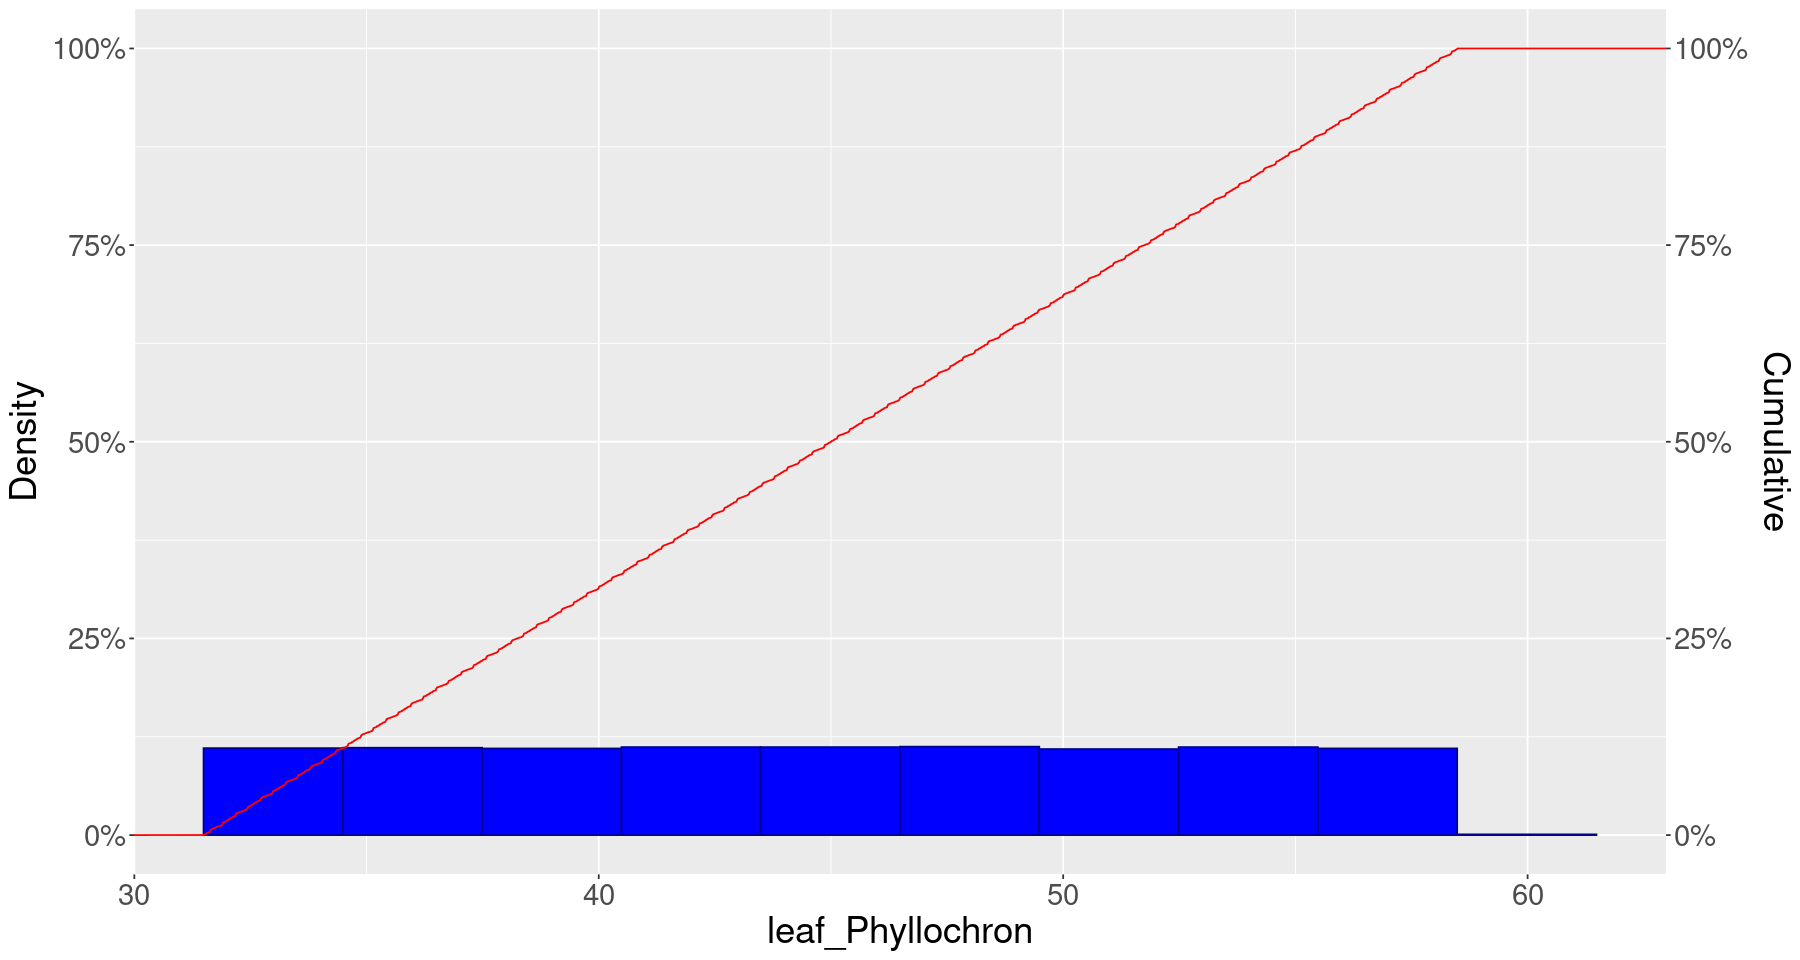

In [19]:
options(repr.plot.width=15, repr.plot.height=8)

# ggplot(data=samples17000, aes(x = value)) +
ggplot(data=samples2, aes(x = leaf_Phyllochron)) +
    geom_histogram(
        # aes(y = ..density..),
        aes(y = after_stat(count / sum(count))), 
        # aes(y = cumsum(..count..)),
        # position="identity",
        colour="darkblue", 
        fill="blue", 
        # binwidth=binwidth
        bins=10
    ) +
    # geom_bar(aes(y = ..density..), fill = "skyblue", color = "black", alpha = 0.7, binwidth = 0.5) +
    # facet_wrap(variable ~ ., scales="free") + 

    # stat_bin(aes(y=cumsum(..count..)),binwidth = 0.2, geom="line",color="red")+
    stat_ecdf(geom = "line", color = "red") +
    # geom_line(stat = "bin") +
    
    # stat_bin(aes(y=cumsum(..count..)),geom="line",color="green")

    scale_y_continuous(
        name = "Density", 
        labels = scales::percent,
        sec.axis = sec_axis(
            ~.*1, 
            name = "Cumulative",
            labels = scales::percent
        )
    ) +
    
    theme(
        legend.position = "bottom",
        text = element_text(size=22)
    )

# Plot obs vs sim with sd

In [5]:
simulated_to_stats <- read.csv("17000_summarize_all_sim_groupby_field.csv", row.names=NULL) |>
    arrange(id) |>
    select(c("field", "Yield", "Biomass", "Flowering", "Maturity"))
dim(simulated_to_stats)
head(simulated_to_stats)

library(readxl)
obsdata_to_stats <- read_excel("dados_campo.xlsx", sheet = "dados_obs") |>
    select(-c("hi", "lai", "dm_pod", "dm_top")) |>
    rename(Biomass=biomass, Yield=yield, Flowering=flowering, Maturity=maturity) |>
    select(c("field", "Yield", "Biomass", "Flowering", "Maturity"))
dim(obsdata_to_stats)
head(obsdata_to_stats)

[1] 544000      5

,field,Yield,Biomass,Flowering,Maturity
,<chr>,<dbl>,<dbl>,<int>,<int>
1,CA14,2709.940,781.534,50,137
2,CA15,3640.821,1006.627,52,142
3,CA16,2490.820,719.494,47,132
4,CR16,3420.140,949.380,53,144
5,CR17,3564.351,983.100,57,149
6,CR18,3883.145,1071.997,57,149


[1] 32  5

field,Yield,Biomass,Flowering,Maturity
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PI14a,2965,1180.0,38,109
PI14b,5375,1851.7,36,116
PI14c,2546,953.0,45,113
PI14d,5255,1645.7,45,123
PI14e,1630,495.5,36,91
PI14f,4082,1262.3,34,104


In [6]:
simulated_to_stats2 <- simulated_to_stats |>
    tidyr::pivot_longer(cols = !field, names_to = "variable", values_to = "sim") |>
    group_by(variable, field) |>
    summarise(
        sim_mean = mean(sim, na.rm=T),
        sim_sd = sd(sim, na.rm=T),
    ) |>
    ungroup()

dim(simulated_to_stats2)
head(simulated_to_stats2)



obsdata_to_stats2 <- obsdata_to_stats |>
    tidyr::pivot_longer(cols = !field, names_to = "variable", values_to = "obs") |>
    select(variable, field, obs)

dim(obsdata_to_stats2)
head(obsdata_to_stats2)

merged <- merge(simulated_to_stats2, obsdata_to_stats2, by = c("variable", "field"))
dim(merged)
head(merged)

`summarise()` has grouped output by 'variable'. You can override using the
`.groups` argument.


[1] 128   4

variable,field,sim_mean,sim_sd
<chr>,<chr>,<dbl>,<dbl>
Biomass,CA14,966.5195,206.2419
Biomass,CA15,1268.8013,257.6816
Biomass,CA16,942.8592,213.7231
Biomass,CR16,1183.8490,240.6306
Biomass,CR17,1201.1818,241.2691
Biomass,CR18,1338.5676,265.6127


[1] 128   3

variable,field,obs
<chr>,<chr>,<dbl>
Yield,PI14a,2965.0
Biomass,PI14a,1180.0
Flowering,PI14a,38.0
Maturity,PI14a,109.0
Yield,PI14b,5375.0
Biomass,PI14b,1851.7


[1] 128   5

,variable,field,sim_mean,sim_sd,obs
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Biomass,CA14,966.5195,206.2419,1108.00
2,Biomass,CA15,1268.8013,257.6816,1093.40
3,Biomass,CA16,942.8592,213.7231,963.70
4,Biomass,CR16,1183.8490,240.6306,1086.52
5,Biomass,CR17,1201.1818,241.2691,1190.34
6,Biomass,CR18,1338.5676,265.6127,1190.30


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_errorbarh()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_errorbarh()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_errorbarh()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


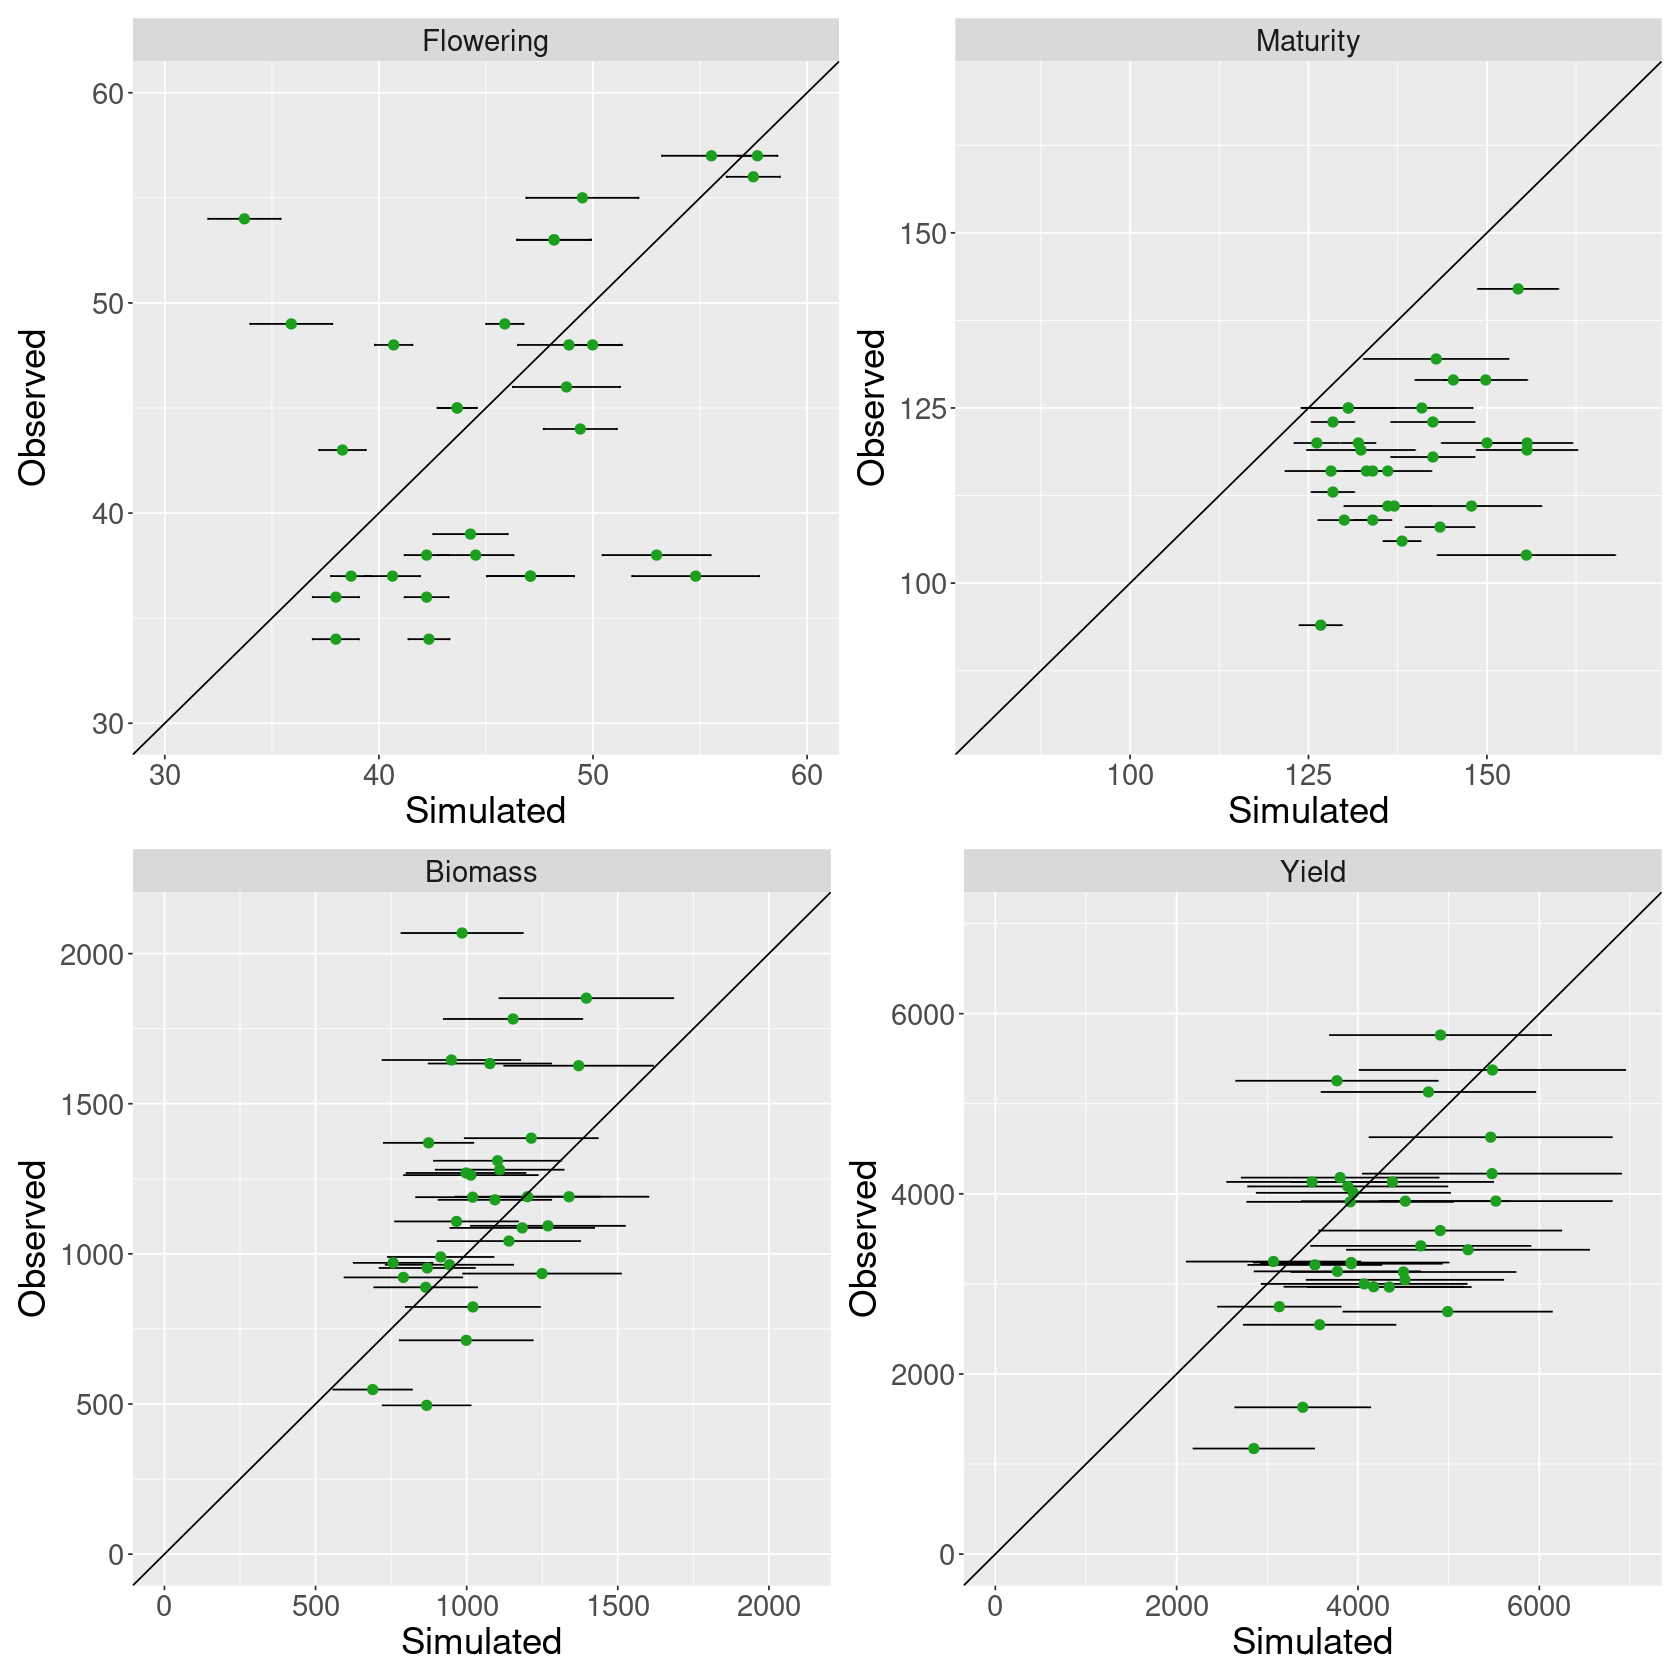

In [7]:
plt <- function(var, lower_lim, upper_lim, axis_labels){
    if(axis_labels){
        x_axis <- "Simulated"
        y_axis <- "Observed"
    }
    else{
        x_axis <- ""
        y_axis <- ""
    }
    
    p <- merged |>
        filter(variable == !!var) |>
        ggplot() +
        geom_errorbarh(aes(xmax = sim_mean + sim_sd, xmin = sim_mean - sim_sd, y=obs), height = 0.1) +
        geom_point(aes(x=sim_mean, y=obs), size=2.5, color="#1c9f1e") +
        facet_wrap(variable ~ ., scales="free") + 
        # expand_limits(x=0, y=0) +
        scale_x_continuous(limits = c(lower_lim, upper_lim)) +
        scale_y_continuous(limits = c(lower_lim, upper_lim)) +
        geom_abline(intercept = 0, slope = 1, color = "black") +
        # geom_blank(data=dummy) + 
        # guides(colour = guide_legend(nrow = 3)) +
        labs(x=x_axis, y=y_axis) +
        theme(
            legend.position = "none",
            text = element_text(size=22),
        ) 
        
    return(p)
}



options(repr.plot.width = 14, repr.plot.height = 14)

p1 <- plt("Flowering", 30, 60, TRUE)
p2 <- plt("Maturity", 80, 170, TRUE)
p3 <- plt("Biomass", 0, 2100, TRUE)
p4 <- plt("Yield", 0, 7000, TRUE)


library(patchwork)
(p1 | p2) / (p3 | p4) + 
    plot_layout(axis_titles = "collect")

    # plot_layout(guides = "collect", heights = c(40, 1)) & 
# p1 + p2 + p3 + p4
# library(gridExtra)
# grid.arrange(p1,p2,p3,p4, nrow=2, ncol=2)


# Stats (mean, sd, cv)

In [40]:
simulated_to_stats <- read.csv("17000_summarize_all_sim_groupby_field.csv", row.names=NULL) |>
    arrange(id) |>
    select(c("field", "Yield", "Biomass", "Flowering", "Maturity"))
head(simulated_to_stats)

library(readxl)
obsdata_to_stats <- read_excel("dados_campo.xlsx", sheet = "dados_obs") |>
    select(-c("hi", "lai", "dm_pod", "dm_top")) |>
    rename(Biomass=biomass, Yield=yield, Flowering=flowering, Maturity=maturity) |>
    select(c("field", "Yield", "Biomass", "Flowering", "Maturity"))
head(obsdata_to_stats)

,field,Yield,Biomass,Flowering,Maturity
,<chr>,<dbl>,<dbl>,<int>,<int>
1,CA14,2709.940,781.534,50,137
2,CA15,3640.821,1006.627,52,142
3,CA16,2490.820,719.494,47,132
4,CR16,3420.140,949.380,53,144
5,CR17,3564.351,983.100,57,149
6,CR18,3883.145,1071.997,57,149


field,Yield,Biomass,Flowering,Maturity
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
PI14a,2965,765.5,38,109
PI14b,5375,1160.7,36,116
PI14c,2546,615.3,45,113
PI14d,5255,992.1,45,123
PI14e,1630,276.1,36,91
PI14f,4082,742.9,34,104


In [42]:
sim_and_obs_summarized_to_stats <- function(df){
    df |>
    mutate(field = case_when(
        grepl('CA',field) ~ "CA",
        grepl('CR',field) ~ "CR",
        grepl('FW',field) ~ "FW",
        grepl('MB',field) ~ "MB",
        grepl('MV',field) ~ "MV",
        grepl('PL',field) ~ "PL",
        grepl('LO14a',field) ~ "LOr",
        grepl('LO14b',field) ~ "LOi",
        grepl('LO14c',field) ~ "LOr",
        grepl('LO14d',field) ~ "LOi",
        grepl('LO14e',field) ~ "LOr",
        grepl('LO14f',field) ~ "LOi",
        grepl('PI14a',field) ~ "PIr",
        grepl('PI14b',field) ~ "PIi",
        grepl('PI14c',field) ~ "PIr",
        grepl('PI14d',field) ~ "PIi",
        grepl('PI14e',field) ~ "PIr",
        grepl('PI14f',field) ~ "PIi",
        .default = field)
    ) |>
    group_by(field) |>
    summarise(
        mean_biomass = mean(Biomass, na.rm=T),
        mean_yield = mean(Yield, na.rm=T),
        # mean_flowering = mean(Flowering, na.rm=T),
        # mean_maturity = mean(Maturity, na.rm=T),
        sd_biomass = sd(Biomass, na.rm=T),
        sd_yield = sd(Yield, na.rm=T),
        # sd_flowering = sd(Flowering, na.rm=T),
        # sd_maturity = sd(Maturity, na.rm=T),
        cv_biomass = sd_biomass / mean_biomass * 100,
        cv_yield = sd_yield / mean_yield * 100,
        # cv_flowering = sd_flowering / mean_flowering * 100,
        # cv_maturity = sd_maturity / mean_maturity * 100
    ) |>
    ungroup()
}


sim <- sim_and_obs_summarized_to_stats(simulated_to_stats) |> mutate(type = "sim")
# head(sim)
obs <- sim_and_obs_summarized_to_stats(obsdata_to_stats) |> mutate(type = "obs")
# head(obs)
bind <- rbind(sim, obs) |> select(type, everything())
head(bind, 30)
write.csv(bind, file.path(base_folder, "stats_mean_sd_cv.csv"))

type,field,mean_biomass,mean_yield,sd_biomass,sd_yield,cv_biomass,cv_yield
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sim,CA,1059.3933,4313.959,271.21074,1342.0240,25.600572,31.108871
sim,CR,1241.1995,5050.083,258.86159,1290.7953,20.855761,25.559882
sim,FW,1214.9389,4886.509,277.73680,1347.9781,22.860145,27.585710
sim,LOi,1003.5705,4108.232,202.86749,1046.3840,20.214573,25.470419
sim,LOr,773.2110,3169.168,158.81490,754.2125,20.539658,23.798436
sim,MB,879.9928,3503.481,207.89007,1060.5365,23.624063,30.270931
sim,MV,1084.8211,4376.382,232.02510,1218.6949,21.388328,27.847090
sim,PIi,1119.8153,4379.185,318.47288,1470.5903,28.439769,33.581373
sim,PIr,943.5404,3770.935,197.72671,934.6090,20.955828,24.784545
